In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
data=yf.download('BTC-USD','2015-01-01','2025-05-30')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
data=pd.DataFrame(data)

In [4]:
data.reset_index(inplace=True)

In [5]:
data.drop(columns=['Date','High','Low','Open','Volume'],inplace=True)

<ipython-input-5-2bee349c47b7>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data.drop(columns=['Date','High','Low','Open','Volume'],inplace=True)


In [6]:
data

Price,Close
Ticker,BTC-USD
0,314.248993
1,315.032013
2,281.082001
3,264.195007
4,274.473999
...,...
3797,109035.390625
3798,109440.367188
3799,108994.640625


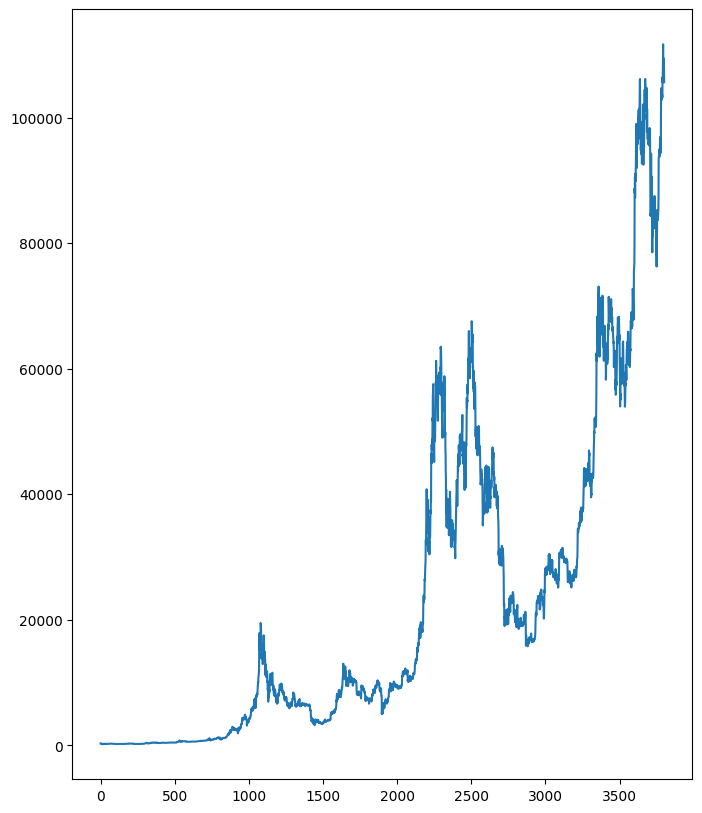

In [7]:
plt.figure(figsize=(8,10))
plt.plot(data)
plt.show()

In [8]:
train_data=data[:-100]
test_data=data[-100:]

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler=MinMaxScaler(feature_range=(0,1))

In [11]:
train_data_scale=scaler.fit_transform(train_data)

In [12]:
base_days=100

In [13]:
x=[]
y=[]
for i in range(base_days,train_data_scale.shape[0]):
    x.append(train_data_scale[i-base_days:i])
    y.append(train_data_scale[i,0])

In [14]:
x,y=np.array(x),np.array(y)

In [15]:
x=np.reshape(x,(x.shape[0],x.shape[1],1))

In [16]:
from keras.layers import LSTM,Dense,Dropout
from keras.models import Sequential

In [17]:
model=Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [21]:
model.fit(x,y,epochs=50,verbose=1)

Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 41s 285ms/step - loss: 0.0424
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 32s 288ms/step - loss: 0.0040
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 40s 275ms/step - loss: 0.0033
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 32s 288ms/step - loss: 0.0032
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 41s 288ms/step - loss: 0.0028
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 41s 283ms/step - loss: 0.0027
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 40s 276ms/step - loss: 0.0024
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 42s 283ms/step - loss: 0.0023
Epoch 9/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 42s 288ms/step - loss: 0.0023
Epoch 10/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 31s 278ms/step - loss: 0.0020
Epoch 11/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 42s 287ms/step - loss: 0.0023
Epoch 12/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 31s 277ms/step - loss: 0.0021
Epoch 13/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 41s 278ms/step - loss: 0.0020
Epoch 14/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 33s 289ms/step - loss: 0.0018
Epoch 15/50
113

In [23]:
test_data=pd.concat((train_data.tail(100),test_data),ignore_index=True)

In [26]:
test_data_scale=scaler.transform(test_data)

In [27]:
x=[]
y=[]
for i in range(base_days,test_data_scale.shape[0]):
    x.append(test_data_scale[i-base_days:i])
    y.append(test_data_scale[i,0])

In [30]:
x,y=np.array(x),np.array(y)

In [31]:
x=np.reshape(x,(x.shape[0],x.shape[1],1))

In [32]:
pred=model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 284ms/step


In [34]:
pred=scaler.inverse_transform(pred)

FUTURE BITCOIN PRICES



In [50]:
m = y.reshape(-1, 1)  # make sure it's 2D
z = []
future_days = 30

# Start with last base_days from original data
inter = m[-base_days:].tolist()

for _ in range(future_days):
    input_seq = np.array([x[0] for x in inter[-base_days:]])  # flatten last base_days
    input_seq = input_seq.reshape(1, base_days, 1)  # shape for LSTM

    pred = model.predict(input_seq, verbose=0)
    z.append(pred[0][0])  # store prediction
    inter.append([pred[0][0]])  # add prediction to input sequence




In [51]:
# Convert to array and inverse transform
z = np.array(z).reshape(-1, 1)
z = scaler.inverse_transform(z)

print(z.flatten())  # cleaner output


[97442.305 96853.625 95567.48  93903.21  92248.125 90752.14  89475.164
 88399.875 87462.305 86588.4   85722.12  84836.35  83928.9   83011.91
 82100.82  81207.2   80336.03  79486.58  78654.914 77836.43  77027.41
 76225.74  75428.016 74633.56  73843.2   73057.4   72275.78  71497.64
 70722.2   69948.87 ]


In [53]:
model.save('Bitcoin_Price_Prediction_Model.keras')

In [54]:
from google.colab import files
files.download('Bitcoin_Price_Prediction_Model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>